# 1. Set the variable test1 to the string 'This is a test of the emergency text system,' and save test1 to a file named test.txt.

### Sol:

In [1]:
test1 = "This is a test of the emergency text system"
my_file = open('text.txt','w')
my_file.write(test1)
my_file.close()

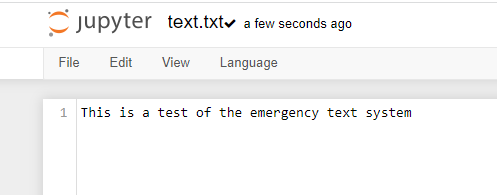

-------
# 2. Read the contents of the file test.txt into the variable test2. Is there a difference between test 1 and test 2?

### Sol:

In [3]:
read_test1 =open('text.txt','r')
test2 = read_test1.readline()

print(test2) #for ref.

read_test1.close()
if test1 == test2:
    print("There is no difference between test1 and test2 file.")

This is a test of the emergency text system
There is no difference between test1 and test2 file.


-----
# 3. Create a CSV file called books.csv by using these lines:
title,author,year<br>
The Weirdstone of Brisingamen,Alan Garner,1960<br>
Perdido Street Station,China Miéville,2000<br>
Thud!,Terry Pratchett,2005<br>
The Spellman Files,Lisa Lutz,2007<br>
Small Gods,Terry Pratchett,1992<br>

In [5]:
import csv

lines = [ ['title','author','year'],
    ['The Weirdstone of Brisingamen','Alan Garner',1960],
    ['Perdido Street Station','China Miéville',2000],
    ['Thud!','Terry Pratchett',2005],
    ['The Spellman Files','Lisa Lutz',2007],
    ['Small Gods','Terry Pratchett',1992]]

with open('books.csv','w', newline ='')as file:
    write =csv.writer(file)
    write.writerows(lines)
    
with open('books.csv','r',newline ='')as file:
    for line in file.readlines():
        print(line)

title,author,year

The Weirdstone of Brisingamen,Alan Garner,1960

Perdido Street Station,China Miéville,2000

Thud!,Terry Pratchett,2005

The Spellman Files,Lisa Lutz,2007

Small Gods,Terry Pratchett,1992



-----
# 4. Use the sqlite3 module to create a SQLite database called books.db, and a table called books with these fields: title (text), author (text), and year (integer).

### Sol:

In [6]:
import sqlite3
conn =sqlite3.connect('books.db')
c = conn.cursor()
c.execute('DROP TABLE IF EXISTS books')
c.execute('create table books(title varchar(20),author varchar(20),year int(20))')
conn.commit()

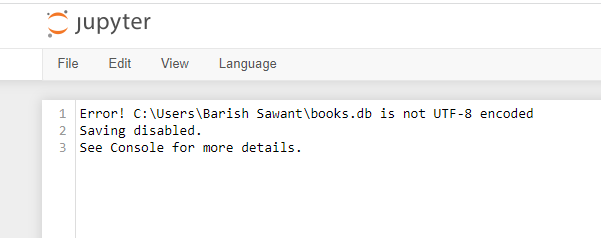

----
# 5. Read books.csv and insert its data into the book table.

### Sol:

In [7]:
import pandas as pd

read_books =pd.read_csv('books.csv',encoding = 'unicode_escape')
read_books.to_sql('books',conn, if_exists='append', index =False)

----
# 6. Select and print the title column from the book table in alphabetical order.

### Sol:

In [8]:
c.execute('select title from books order by title asc')
print(c.fetchall())

[('Perdido Street Station',), ('Small Gods',), ('The Spellman Files',), ('The Weirdstone of Brisingamen',), ('Thud!',)]


-----
# 7. From the book table, select and print all columns in the order of publication.


### Sol:

In [9]:
c.execute('select title, author,year from books order by year')
#print(c.fetchall())

df = pd.DataFrame(c.fetchall(), columns=['title','author','year'])
df

,title,author,year
0,The Weirdstone of Brisingamen,Alan Garner,1960
1,Small Gods,Terry Pratchett,1992
2,Perdido Street Station,China Miéville,2000
3,Thud!,Terry Pratchett,2005
4,The Spellman Files,Lisa Lutz,2007


-----
# 8. Use the sqlalchemy module to connect to the sqlite3 database books.db that you just made in exercise 6.

### Sol:

In [10]:
import sqlalchemy
engine = sqlalchemy.create_engine("sqlite:///books.db")
rows = engine.execute('select * from books')
for i in rows:
    print(i)

('The Weirdstone of Brisingamen', 'Alan Garner', 1960)
('Perdido Street Station', 'China Miéville', 2000)
('Thud!', 'Terry Pratchett', 2005)
('The Spellman Files', 'Lisa Lutz', 2007)
('Small Gods', 'Terry Pratchett', 1992)


----
# 9. Install the Redis server and the Python redis library (pip install redis) on your computer. Create a Redis hash called test with the fields count (1) and name ('Fester Bestertester'). Print all the fields for test.

### Sol:

In [11]:
#pip install redis

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import redis
conn = redis.Redis()
conn.delete('test')
conn.hmset('test', {'count': 1, 'name': 'Fester Bestertester'})
conn.hgetall('test')

-------
# 10. Increment the count field of test and print it.

### Sol:

In [ ]:
conn.hincrby('test','count', 3)